# Flight Data Analysis

This notebook provides an analysis of various flight datasets, focusing on flight states, arrivals, departures, and other relevant parameters. Through visualizations and analysis, we explore key relationships between different variables such as flight velocity, altitude, and geographic locations.

## Dataset Overview

We are analyzing several datasets related to flights, which include:

- Flight states: Information about the position, altitude, and velocity of various flights.
- Arrivals and Departures: Flight arrival and departure data.
- Aircraft-specific data.

Let's dive into the exploratory data analysis (EDA) and generate insights based on visualizations.


In [95]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn theme for better plots
sns.set_theme()

# Define the path to your CSV files
data_dir = "../data/"

# Dictionary of file paths
csv_files = {
    "flight_states.csv": "../data/flight_states.csv",
    "test_arrivals.csv": "../data/test_arrivals.csv",
    "arrivals.csv": "../data/arrivals.csv",
    "flights_by_aircraft.csv": "../data/flights_by_aircraft.csv",
    "departures.csv": "../data/departures.csv",
    "flights.csv": "../data/flights.csv",
    "test_flight_states.csv": "../data/test_flight_states.csv",
}

# Dictionary to store DataFrames
dataframes = {}

# Load each CSV file
for file_name, file_path in csv_files.items():
    try:
        dataframes[file_name] = pd.read_csv(file_path)
        print(f"Loaded {file_name} successfully.")
    except FileNotFoundError:
        print(f"File not found: {file_name}")

Loaded flight_states.csv successfully.
Loaded test_arrivals.csv successfully.
Loaded arrivals.csv successfully.
Loaded flights_by_aircraft.csv successfully.
Loaded departures.csv successfully.
Loaded flights.csv successfully.
Loaded test_flight_states.csv successfully.


In [80]:
# Load each CSV file into a DataFrame
flight_states_df = pd.read_csv(data_dir + "flight_states.csv")
test_arrivals_df = pd.read_csv(data_dir + "test_arrivals.csv")
arrivals_df = pd.read_csv(data_dir + "arrivals.csv")
flights_by_aircraft_df = pd.read_csv(data_dir + "flights_by_aircraft.csv")
departures_df = pd.read_csv(data_dir + "departures.csv")
flights_df = pd.read_csv(data_dir + "flights.csv")
test_flight_states_df = pd.read_csv(data_dir + "test_flight_states.csv")

In [81]:
# Check the first few rows of each dataframe
print(flight_states_df.head())
print(test_arrivals_df.head())
print(arrivals_df.head())
print(flights_by_aircraft_df.head())
print(departures_df.head())
print(flights_df.head())
print(test_flight_states_df.head())

   Longitude  Latitude  Barometric Altitude  Velocity
0  -123.1971   44.1939              2720.34     76.49
1  -150.0152   65.3258              2202.18     81.25
2   -95.3586   29.6129              1325.88    122.63
3   -86.2801   40.5092              1005.84     62.93
4   -71.7129   42.3923              1546.86    128.23
  Arrival Airport Departure Airport  Arrival Time  Time of Departure
0            EDDF              EKCH    1673074733       1.673071e+09
1            EDDF              EPKK    1673074525       1.673070e+09
2            EDDF               NaN    1673074518       1.673030e+09
3            EDDF              ENBR    1673074437       1.673068e+09
4            EDDF              LIML    1673074376       1.673071e+09
   Time of Departure Departure Airport Arrival Airport  Arrival Time
0       1.673071e+09              EKCH            EDDF    1673074733
1       1.673070e+09              EPKK            EDDF    1673074525
2       1.673030e+09               NaN            EDDF 

# Analyzing Flight Behavior Patterns


**Summary Statistics**

Summary of statistics to understand the distributions, especially for numeric columns.


In [82]:
# Get basic summary statistics for each dataset
print(flight_states_df.describe())
print(arrivals_df.describe())
print(flights_by_aircraft_df.describe())
print(departures_df.describe())
print(flights_df.describe())

         Longitude     Latitude  Barometric Altitude     Velocity
count  9896.000000  9896.000000          9209.000000  9997.000000
mean    -55.276178    36.195130          6350.081366   152.440377
std      67.210295    16.151366          4473.617544    87.082199
min    -169.712300   -47.396600           -45.720000     0.000000
25%     -97.773750    33.640925          1569.720000    65.890000
50%     -81.956800    38.962300          6812.280000   175.660000
75%      -0.290450    43.120700         10668.000000   229.970000
max     177.945600    67.184600         22037.040000   954.810000
       Time of Departure  Arrival Time
count       2.848000e+03  2.860000e+03
mean        1.672804e+09  1.672814e+09
std         1.445654e+05  1.447595e+05
min         1.672462e+09  1.672556e+09
25%         1.672673e+09  1.672682e+09
50%         1.672806e+09  1.672818e+09
75%         1.672925e+09  1.672932e+09
max         1.673072e+09  1.673075e+09
       Time of Departure  Arrival Time  Horizonal Dista

In [83]:
# Check for missing data in each dataset
print(flight_states_df.isnull().sum())
print(arrivals_df.isnull().sum())
print(flights_by_aircraft_df.isnull().sum())
print(departures_df.isnull().sum())
print(flights_df.isnull().sum())

Longitude              102
Latitude               102
Barometric Altitude    789
Velocity                 1
dtype: int64
Time of Departure     12
Departure Airport    619
Arrival Airport        0
Arrival Time           0
dtype: int64
icao24                               0
Time of Departure                    0
Departure Airport                    4
Arrival Airport                      0
Arrival Time                         0
Horizonal Distance From Departure    4
Vertical Distance From Departure     4
Horizonal Distance From Arrival      0
Vertical Distance From Arrival       0
dtype: int64
Time of Departure                      0
Departure Airport                      0
Arrival Airport                      317
Arrival Time                           0
Horizonal Distance From Departure      0
Vertical Distance From Departure       0
Horizonal Distance From Arrival      317
Vertical Distance From Arrival       317
dtype: int64
id                   0
year                 0
month          

### Flight Delays Analysis (flights.csv)


In [84]:
# Calculate delay duration for departures and arrivals
flights_df["dep_delay"] = flights_df["dep_time"] - flights_df["sched_dep_time"]
flights_df["arr_delay"] = flights_df["arr_time"] - flights_df["sched_arr_time"]

# Average delay by airline
avg_dep_delay_by_airline = (
    flights_df.groupby("name")["dep_delay"].mean().sort_values(ascending=False)
)
avg_arr_delay_by_airline = (
    flights_df.groupby("name")["arr_delay"].mean().sort_values(ascending=False)
)

print("Average Departure Delay by Airline")
print(avg_dep_delay_by_airline)
print("\nAverage Arrival Delay by Airline")
print(avg_arr_delay_by_airline)

Average Departure Delay by Airline
name
Frontier Airlines Inc.         30.127566
Mesa Airlines Inc.             29.051376
ExpressJet Airlines Inc.       24.774301
Endeavor Air Inc.              23.556270
Southwest Airlines Co.         21.459157
Virgin America                 15.613526
United Air Lines Inc.          15.091982
AirTran Airways Corporation    14.634452
Envoy Air                      13.214680
Alaska Airlines Inc.           10.018258
American Airlines Inc.          9.443524
Delta Air Lines Inc.            4.693411
SkyWest Airlines Inc.           1.551724
US Airways Inc.                -8.892065
JetBlue Airways               -15.593107
Hawaiian Airlines Inc.        -25.625731
Name: dep_delay, dtype: float64

Average Arrival Delay by Airline
name
SkyWest Airlines Inc.          29.862069
Frontier Airlines Inc.         26.854626
Mesa Airlines Inc.             20.115809
US Airways Inc.                -5.436246
Envoy Air                      -6.081113
Southwest Airlines Co.      

### Flight Path Analysis (flight_states.csv)


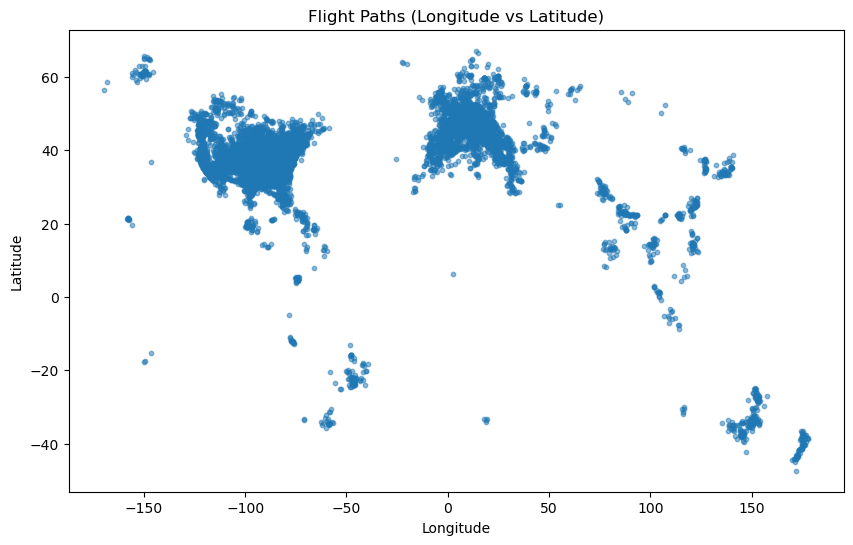

In [85]:
# Plot flight paths from flight_states.csv
plt.figure(figsize=(10, 6))
plt.scatter(
    flight_states_df["Longitude"], flight_states_df["Latitude"], alpha=0.5, s=10
)
plt.title("Flight Paths (Longitude vs Latitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Arrival and Departure Distance (flights_by_aircraft.csv & departures.csv)


In [86]:
# Average horizontal and vertical distances
avg_horiz_dist_departure = departures_df["Horizonal Distance From Departure"].mean()
avg_vert_dist_departure = departures_df["Vertical Distance From Departure"].mean()

avg_horiz_dist_arrival = flights_by_aircraft_df[
    "Horizonal Distance From Arrival"
].mean()
avg_vert_dist_arrival = flights_by_aircraft_df["Vertical Distance From Arrival"].mean()

print(f"Average Horizontal Distance from Departure: {avg_horiz_dist_departure}")
print(f"Average Vertical Distance from Departure: {avg_vert_dist_departure}")
print(f"Average Horizontal Distance from Arrival: {avg_horiz_dist_arrival}")
print(f"Average Vertical Distance from Arrival: {avg_vert_dist_arrival}")

Average Horizontal Distance from Departure: 2393.8711225997044
Average Vertical Distance from Departure: 75.47008862629247
Average Horizontal Distance from Arrival: 4749.142857142857
Average Vertical Distance from Arrival: 224.0


### Correlation Between Velocity and Altitude (flight_states.csv)


In [87]:
# Check correlation between Velocity and Barometric Altitude
correlation = flight_states_df["Velocity"].corr(flight_states_df["Barometric Altitude"])
print(f"Correlation between Velocity and Barometric Altitude: {correlation}")

Correlation between Velocity and Barometric Altitude: 0.8917569017356278


### Time of Departure Distribution (flights.csv)


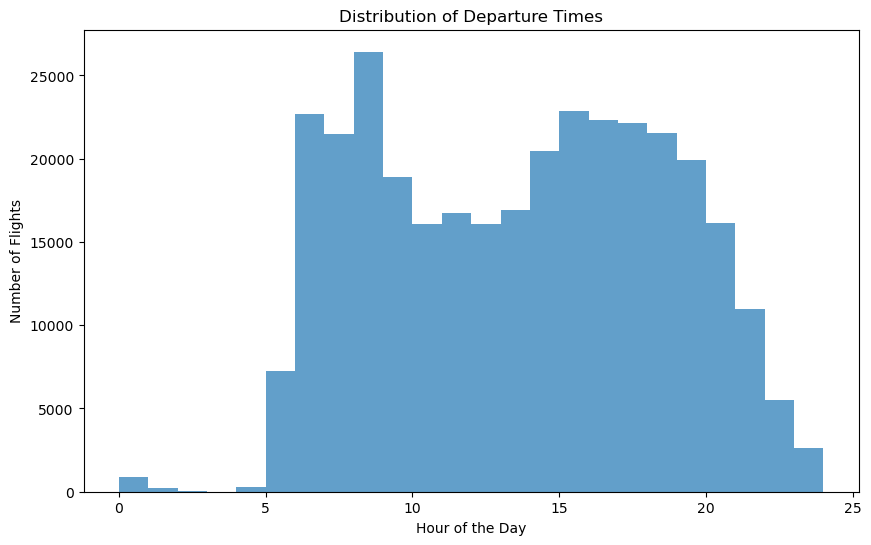

In [88]:
# Convert dep_time to hours
flights_df["dep_hour"] = (
    flights_df["dep_time"] // 100
)  # This assumes dep_time is in HHMM format

# Plot distribution of departure times
plt.figure(figsize=(10, 6))
flights_df["dep_hour"].plot(kind="hist", bins=24, alpha=0.7)
plt.title("Distribution of Departure Times")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Flights")
plt.show()

### Delay Distribution by Airline


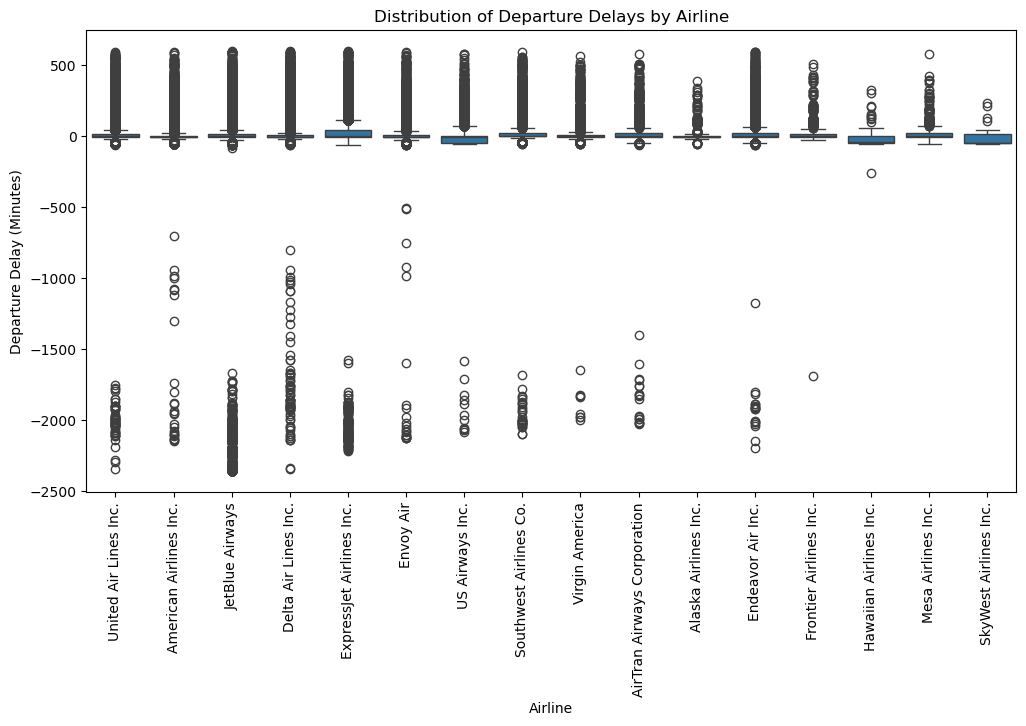

In [89]:
# Remove outliers by filtering flights with extreme delays
flights_df_filtered = flights_df[
    (flights_df["dep_delay"] < 600) & (flights_df["arr_delay"] < 600)
]

# Plot boxplots for departure delay distribution by airline
plt.figure(figsize=(12, 6))
sns.boxplot(x="name", y="dep_delay", data=flights_df_filtered)
plt.title("Distribution of Departure Delays by Airline")
plt.xlabel("Airline")
plt.ylabel("Departure Delay (Minutes)")
plt.xticks(rotation=90)
plt.show()

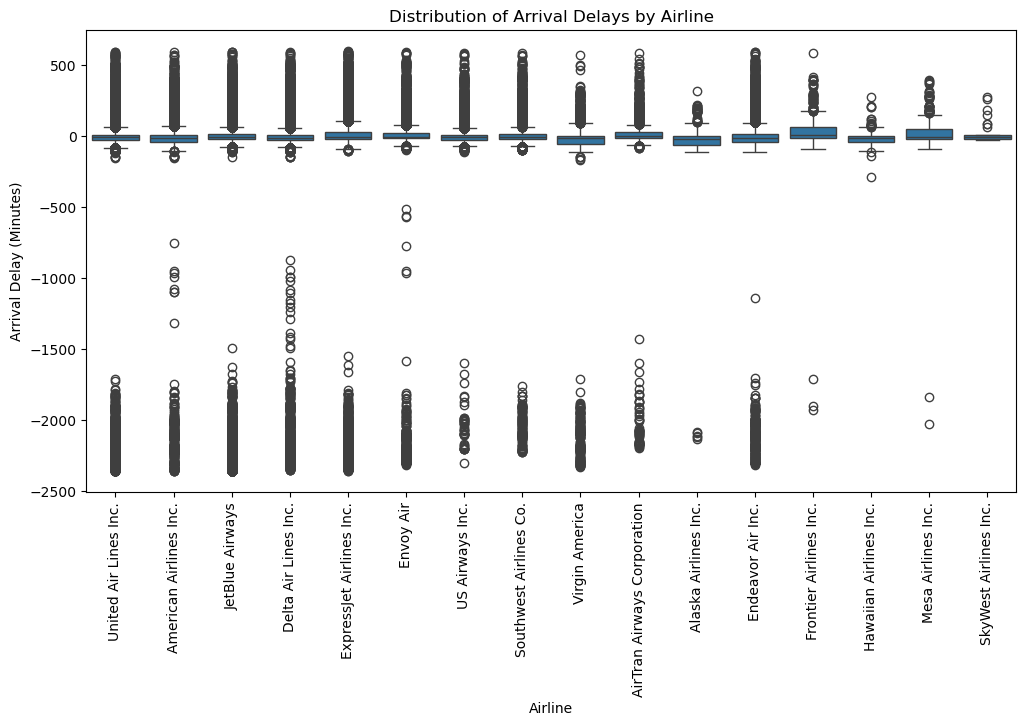

In [90]:
# Plot boxplots for arrival delay distribution by airline
plt.figure(figsize=(12, 6))
sns.boxplot(x="name", y="arr_delay", data=flights_df_filtered)
plt.title("Distribution of Arrival Delays by Airline")
plt.xlabel("Airline")
plt.ylabel("Arrival Delay (Minutes)")
plt.xticks(rotation=90)
plt.show()

### Departure and Arrival Time Patterns


dep_time    8255
arr_time    8713
dtype: int64


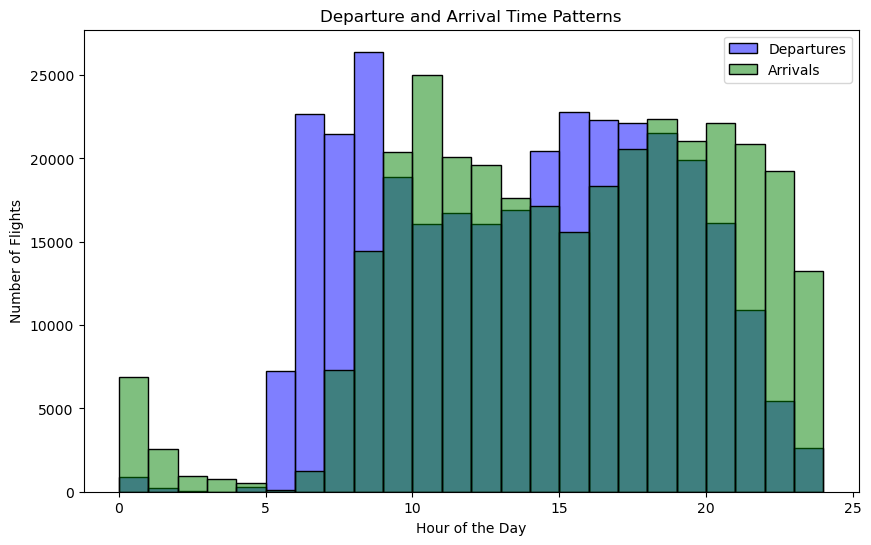

In [91]:
# Check if there are any missing values in 'dep_time' and 'arr_time'
print(flights_df[["dep_time", "arr_time"]].isna().sum())

# Drop rows where 'dep_time' or 'arr_time' is NaN (if necessary)
flights_df_cleaned = flights_df.dropna(
    subset=["dep_time", "arr_time"]
).copy()  # Use .copy() to avoid view vs copy issues

# Ensure that 'arr_time' and 'dep_time' are integers (assuming they are in HHMM format)
flights_df_cleaned["arr_time"] = flights_df_cleaned["arr_time"].astype(int)
flights_df_cleaned["dep_time"] = flights_df_cleaned["dep_time"].astype(int)

# Extract hour from 'arr_time' and 'dep_time'
flights_df_cleaned["arr_hour"] = flights_df_cleaned["arr_time"] // 100
flights_df_cleaned["dep_hour"] = flights_df_cleaned["dep_time"] // 100

# Plot departure and arrival times (now using the cleaned DataFrame)
plt.figure(figsize=(10, 6))
sns.histplot(
    flights_df_cleaned["dep_hour"],
    bins=24,
    kde=False,
    color="blue",
    label="Departures",
    alpha=0.5,
)
sns.histplot(
    flights_df_cleaned["arr_hour"],
    bins=24,
    kde=False,
    color="green",
    label="Arrivals",
    alpha=0.5,
)
plt.title("Departure and Arrival Time Patterns")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Flights")
plt.legend()
plt.show()

### Altitude vs Velocity (Scatter Plot)


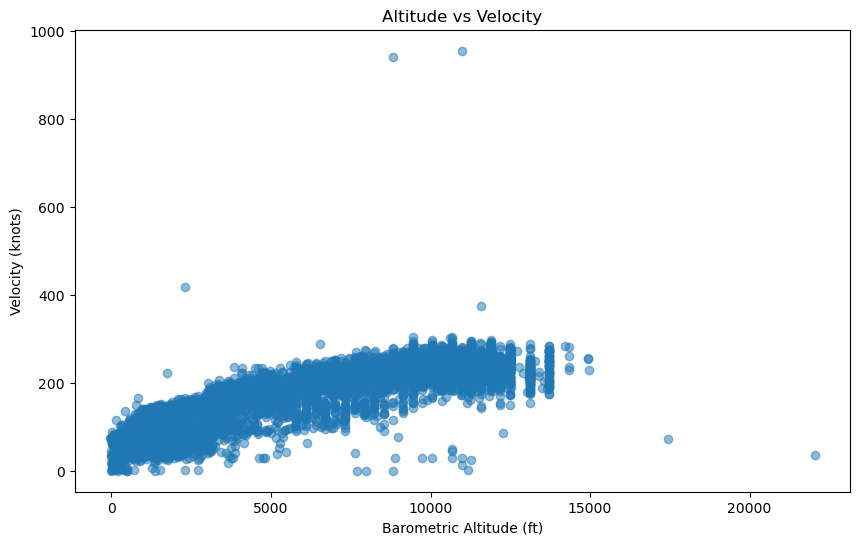

In [92]:
plt.figure(figsize=(10, 6))
plt.scatter(
    flight_states_df["Barometric Altitude"], flight_states_df["Velocity"], alpha=0.5
)
plt.title("Altitude vs Velocity")
plt.xlabel("Barometric Altitude (ft)")
plt.ylabel("Velocity (knots)")
plt.show()

### Flight Path Density Plot


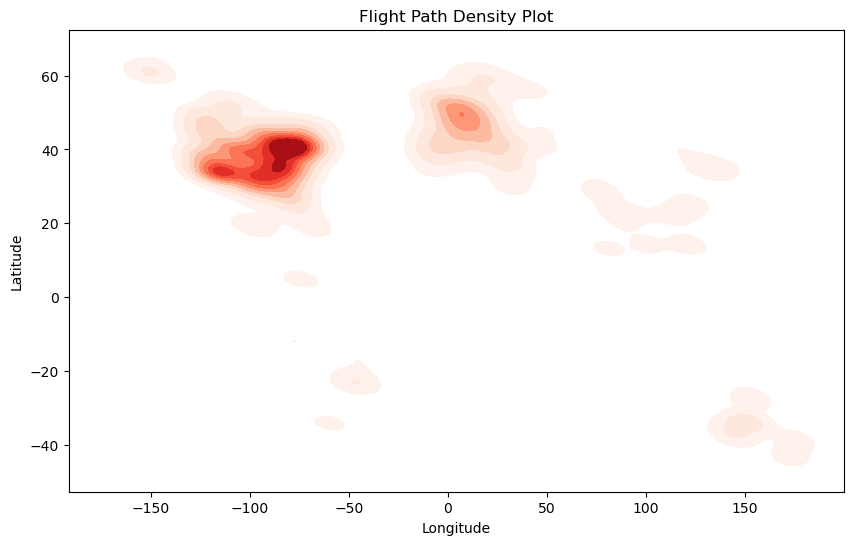

In [93]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=flight_states_df["Longitude"],
    y=flight_states_df["Latitude"],
    cmap="Reds",
    fill=True,
    bw_adjust=0.5,
)
plt.title("Flight Path Density Plot")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Correlation Heatmap (for Key Variables)


Numeric columns in flights_df: Index(['id', 'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'flight', 'air_time',
       'distance', 'hour', 'minute', 'dep_hour'],
      dtype='object')


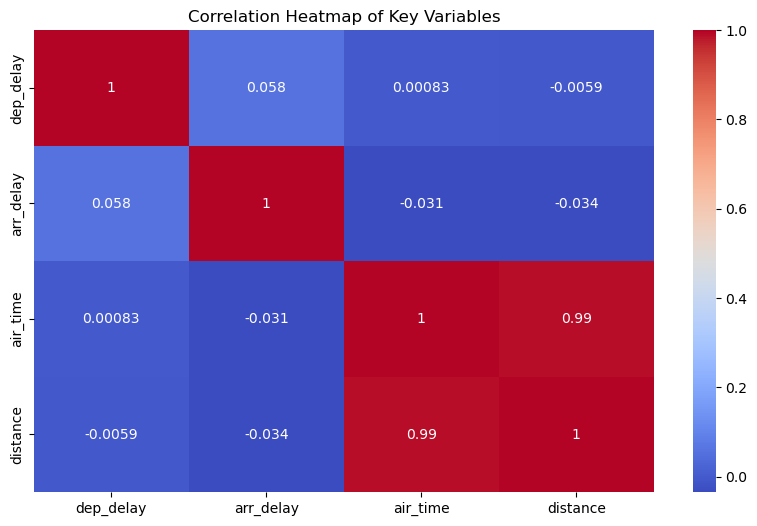

In [94]:
# Identify and print available numeric columns
numeric_columns = flights_df.select_dtypes(include=["float64", "int64"]).columns
print("Numeric columns in flights_df:", numeric_columns)

# Select existing numeric columns for correlation
# Replace these columns with those that are present in your DataFrame
corr_columns = ["dep_delay", "arr_delay", "air_time", "distance"]  # Example columns
corr_df = flights_df[corr_columns].dropna()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Key Variables")
plt.show()